<a href="https://colab.research.google.com/github/mneae/dog_breed_identification/blob/main/dog_breed_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: https://www.kaggle.com/competitions/dog-breed-identification/data

Using a dataset of 120 dog breeds from Kaggle, we will try to build a model to identify the breed of a dog from a photo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
labels = pd.read_csv('/content/drive/MyDrive/DogBreed/labels.csv')

In [3]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
print(labels.shape)
print(len(labels['breed'].unique())) # Number of classes
print(labels['breed'].unique())

(10222, 2)
120
['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'airedale' 'leonb

In [5]:
labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [6]:
labels.isna().sum()

id       0
breed    0
dtype: int64

In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


We will resize the images and normalize the pixel values.

In [8]:
dataset_path = '/content/drive/MyDrive/DogBreed/train'
new_size = (128, 128)
resized_img_list = []

for image_id in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image_id)
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)
    resized_img_array = tf.image.resize(img_array, new_size)
    resized_img_array = resized_img_array / 255.0
    resized_img_list.append(resized_img_array)

Let's see some random images

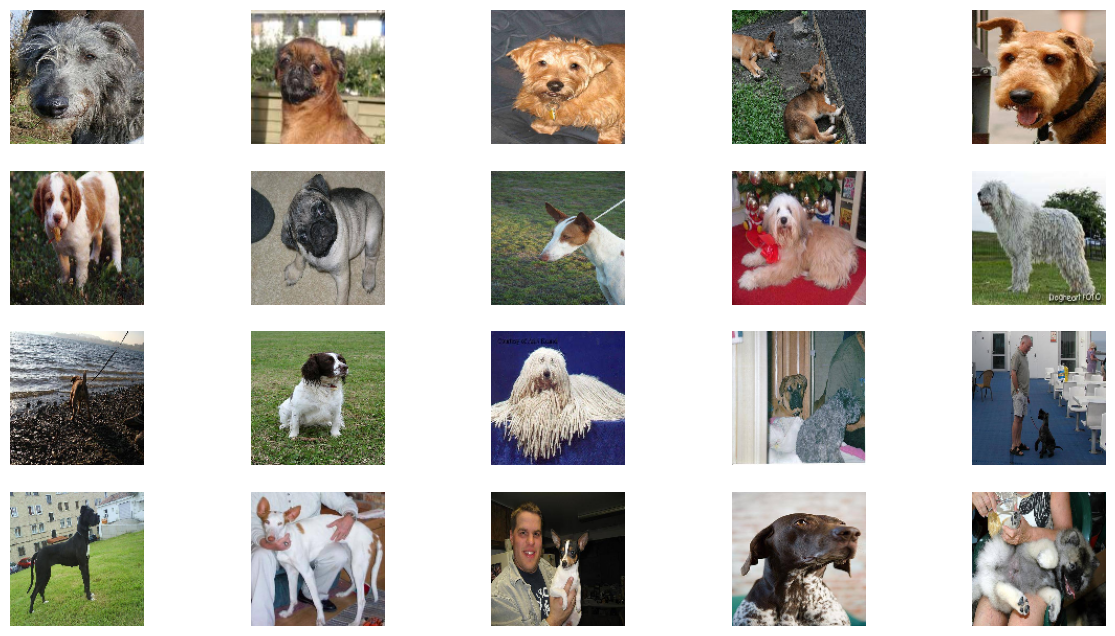

In [9]:
random_images = random.sample(resized_img_list, 20)

plt.figure(figsize=(15, 8))
for i, img_array in enumerate(random_images, 1):
    plt.subplot(4, 5, i)
    plt.imshow(img_array)
    plt.axis('off')

plt.show()


### Data Preprocessing

In [10]:
X = np.array(resized_img_list)

In [11]:
y = labels.loc[:, 'breed']
y = np.array(y)

In [12]:
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5, random_state=1)

In [13]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [14]:
print(f'Length of the dataset: {len(X)}')
print(f'Lenght of the training dataset: {len(X_train)}')
print(f'Lenght of the validation dataset: {len(X_val)}')
print(f'Lenght of the test dataset: {len(X_test)}')

Length of the dataset: 10222
Lenght of the training dataset: 8177
Lenght of the validation dataset: 1022
Lenght of the test dataset: 1023


### Building the Model

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,
                                 (3,3),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(120, activation="softmax"))

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [18]:
results = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
256/256 [==============================] - 17s 17ms/step - loss: 4.7929 - accuracy: 0.0093 - val_loss: 4.7849 - val_accuracy: 0.0098
Epoch 2/10
256/256 [==============================] - 3s 12ms/step - loss: 4.7848 - accuracy: 0.0097 - val_loss: 4.7842 - val_accuracy: 0.0108
Epoch 3/10
256/256 [==============================] - 3s 14ms/step - loss: 4.7826 - accuracy: 0.0116 - val_loss: 4.7838 - val_accuracy: 0.0088
Epoch 4/10
256/256 [==============================] - 4s 14ms/step - loss: 4.7792 - accuracy: 0.0117 - val_loss: 4.7833 - val_accuracy: 0.0127
Epoch 5/10
256/256 [==============================] - 3s 12ms/step - loss: 4.7752 - accuracy: 0.0131 - val_loss: 4.7847 - val_accuracy: 0.0098
Epoch 6/10
256/256 [==============================] - 3s 12ms/step - loss: 4.7621 - accuracy: 0.0116 - val_loss: 4.7897 - val_accuracy: 0.0098
Epoch 7/10
256/256 [==============================] - 13s 52ms/step - loss: 4.7247 - accuracy: 0.0175 - val_loss: 4.8035 - val_accuracy: 0.01

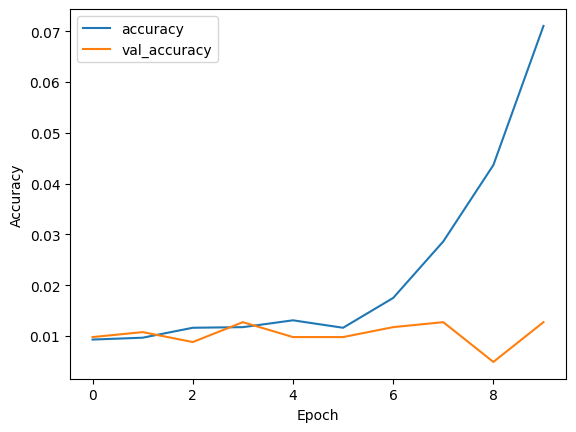

In [19]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

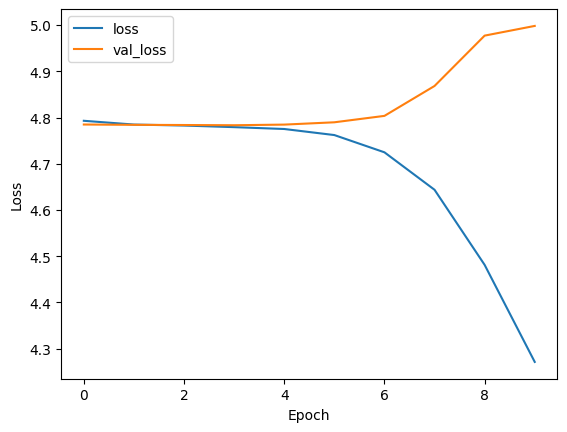

In [20]:
plt.plot(results.history["loss"], label="loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

We can see from the graphs that the model started to overfit around the 6th epoch. To prevent this we can use the Early Stopping method.

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
results = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])